<a href="https://colab.research.google.com/github/mg253a/Challenge_Telecom_X_Desarrollo/blob/main/Telecom_data_sol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS DE PREDICCION DE CANCELACION (CHURN), TELECOM X**

#Objetivo



✅ Preparar los datos para el modelado (tratamiento, codificación, normalización).

✅ Realizar análisis de correlación y selección de variables.

✅ Entrenar dos o más modelos de clasificación.

✅ Evaluar el rendimiento de los modelos con métricas.

✅ Interpretar los resultados, incluyendo la importancia de las variables.

✅ Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

**Análisis X-telecomm, parte 1**

# 📌 Extracción

Para iniciar el análisis, necesitaremos importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.
📌 Enlace de la API:
🔗 https://github.com/mg253a/Challenge_Telecom_-X_MG/blob/main/TelecomX_Data.json

## 📦 Extracción de los datos (CÓDIGO)

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [19]:
# Paso 1: Cargar los datos directamente desde la API utilizando Python.
url = 'https://raw.githubusercontent.com/mg253a/Challenge_Telecom_-X_MG/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [20]:
# Paso 2: Confirmar estructura inicial
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [21]:
# Revisión general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [22]:
# Tipos de datos y descripción general
print(df.describe(include='all'))

        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                                 1581   

       

# 🔧Transformación

Ahora que extraímos los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, se ha creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, podemos ayudarnos a comprender mejor la información disponible.

## Conociendo los datos

### Diccionario de datos

* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

## Explorando los datos y transformando

* Explorar las columnas del dataset y verificar sus tipos de datos.
* Consultar el diccionario para comprender mejor el significado de las variables.
* Identificar las columnas más relevantes para el análisis de evasión.

Se sugiere DataFrame.info(); DataFrame.dtype, en la exloración y análisis


### Durante la revisión considerar

* Valores duplicados
* Valores vacios
* Valores nulos
* Tipos de datos
* Valores irregulares o atípicos
* Consistencia y validez de valores categóricos
* Normalizacion de textos

## 🔧 Transformación y limpieza de datos (CÓDIGO)

### Comprobación de incoherencias en los datos

En este paso, verificar si hay problemas en los datos que puedan afectar el análisis. Prestar atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Se recomienda usar pandas.unique(); pandas.Series.dt.normalize()

In [23]:
#Convertir los datos a un DataFrame de Pandas para facilitar su manipulación

#Normalizar textos

from pandas import json_normalize

df = json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [24]:
# Eliminar duplicados
print("Duplicados eliminados:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicados eliminados: 0


In [25]:
# Normalizar textos en columnas categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [26]:
# Valores nulos
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### Manejo de inconsistencias


Ahora que se ha identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajustar los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [27]:
# Convertir valores numéricos erróneos
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [29]:
# Rellenar valores nulos si es necesario
df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean(), inplace=True)

/tmp/ipython-input-1055073861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
/tmp/ipython-input-1055073861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [30]:
#Eliminando las columnas de Churn
df = df[df['Churn'].str.strip() !='']
print("Numero de filas después de eliminar las vacías en 'Churn':", len(df))

Numero de filas después de eliminar las vacías en 'Churn': 7043


### Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [31]:
# ===============================
# ➗ NUEVA COLUMNA: Cuentas_Diarias
# ===============================
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

/tmp/ipython-input-1694342191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


# **Análisis X-telecomm, parte 2**

## 🔧Eliminación de Columnas Irrelevantes

Eliminar columnas que no aporten valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente).

Estas columnas nos ayudarán en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

In [36]:
# Eliminar columnas irrelevantes para el modelo
columns_to_drop = ['customerID']  # IDs y columnas sin información
data_clean = df.drop(columns=columns_to_drop, errors='ignore')

# Verificar las columnas restantes
print(data_clean.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


## 🔧Encoding de variables categóricas


Transformar las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

Utilizar un método de codificación adecuado, como one-hot encoding.


In [37]:
# Identificar columnas categóricas
categorical_cols = data_clean.select_dtypes(include=['object']).columns.tolist()

# Aplicar one-hot encoding
data_encoded = pd.get_dummies(data_clean, columns=categorical_cols, drop_first=True)

# Verificar el resultado
print(data_encoded.head())

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  Cuentas_Diarias  Churn_yes  customer.gender_male  \
0                 593.30         2.186667      False                 False   
1                 542.40         1.996667      False                  True   
2                 280.85         2.463333       True                  True   
3                1237.85         3.266667       True                  True   
4                 267.40         2.796667       True                 False   

   customer.Partner_yes  customer.Dependents_yes  phone.PhoneService_yes  ...  \
0                  True

## 🔧Verificación de la Proporción de Cancelación (Churn)

Calcular la proporción de clientes que cancelaron en relación con los que permanecieron activos.

Evaluar si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.


Tasa de cancelación (Churn): 26.54%


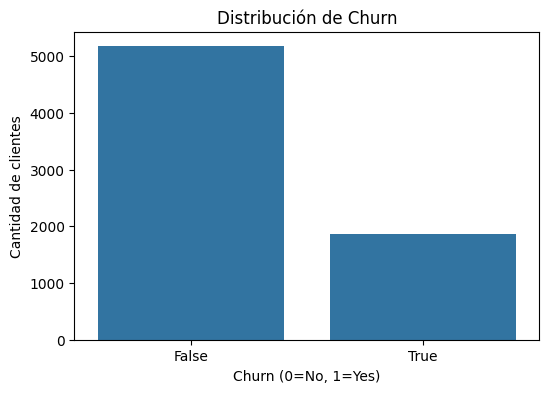

In [39]:
# Calcular proporción de churn
churn_rate = data_encoded['Churn_yes'].mean()
print(f"Tasa de cancelación (Churn): {churn_rate:.2%}")

# Visualización
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_yes', data=data_encoded)
plt.title('Distribución de Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Cantidad de clientes')
plt.show()

## 🔧Balanceo de Clases


Profundizar en el análisis, aplicando técnicas de balanceo como undersampling o oversampling.

En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.


In [40]:
# Separar características y objetivo
X = data_encoded.drop('Churn_yes', axis=1)
y = data_encoded['Churn_yes']

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Verificar el nuevo balance
print(f"Proporción después de SMOTE: {y_balanced.mean():.2%}")

Proporción después de SMOTE: 50.00%


## 🔧Normalización o Estandarización


Evaluando la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán.

Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.


In [44]:
# Seleccionar solo las columnas numéricas para normalizar
numeric_cols = X_balanced.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Aplicar estandarización
scaler = StandardScaler()
X_balanced[numeric_cols] = scaler.fit_transform(X_balanced[numeric_cols])

# Verificar
print(X_balanced.describe())

       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count            1.034800e+04     1.034800e+04             1.034800e+04   
mean             7.690451e-17     4.394543e-17             1.098636e-17   
std              1.000048e+00     1.000048e+00             1.000048e+00   
min             -3.955497e-01    -1.152983e+00            -1.733416e+00   
25%             -3.955497e-01    -9.445296e-01            -7.781630e-01   
50%             -3.955497e-01    -2.774796e-01             2.339488e-01   
75%             -3.955497e-01     8.898580e-01             8.016064e-01   
max              2.528127e+00     1.848743e+00             1.766056e+00   

       account.Charges.Total  Cuentas_Diarias  
count           1.034800e+04     1.034800e+04  
mean            1.538090e-16    -2.197272e-17  
std             1.000048e+00     1.000048e+00  
min            -9.288636e-01    -1.733416e+00  
25%            -8.127775e-01    -7.781630e-01  
50%            -3.998480e-01     2.3

## 🔧Correlación y Selección de Variables

###Análisis de Correlación

Visualizar la matriz de correlación para identificar relaciones entre las variables numéricas.
Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

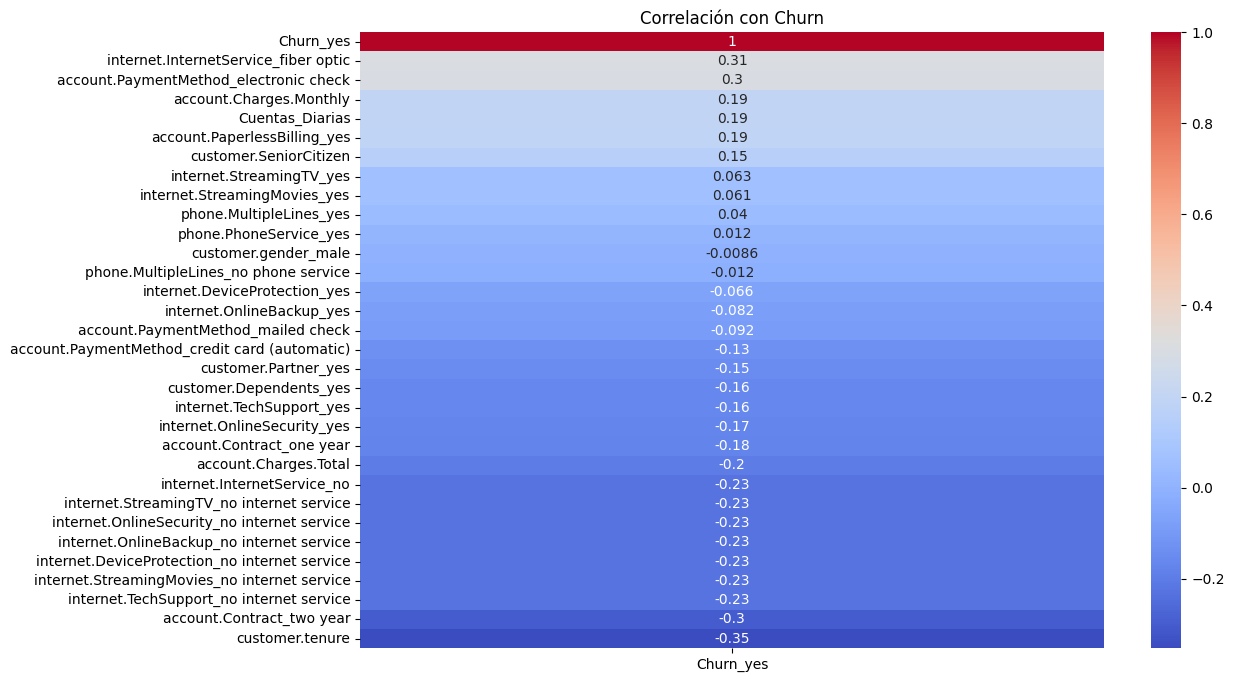

In [46]:
# Calcular matriz de correlación
corr_matrix = data_encoded.corr()

# Visualizar correlación con Churn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['Churn_yes']].sort_values(by='Churn_yes', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlación con Churn')
plt.show()

###Análisis Dirigido


Investigar cómo variables específicas se relacionan con la cancelación, tales como:
* Tiempo de contrato x Cancelación
* Gasto total x Cancelación

Utilizar gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.


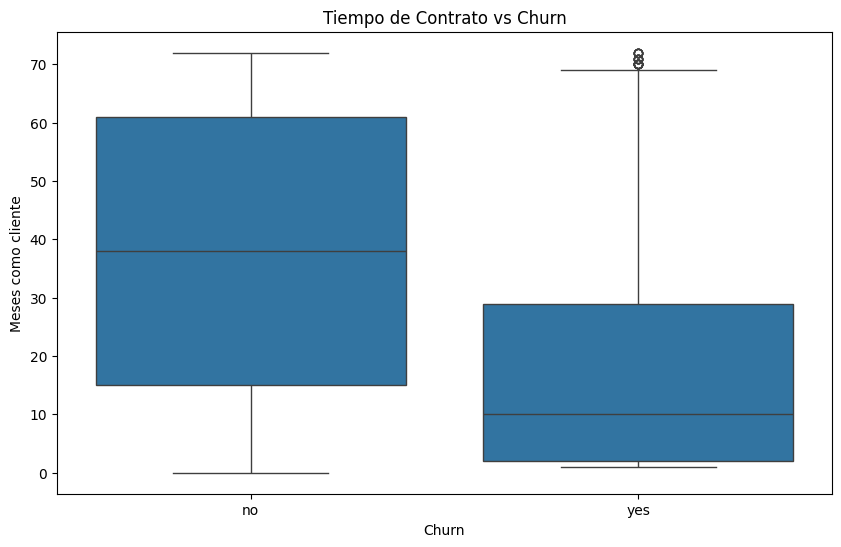

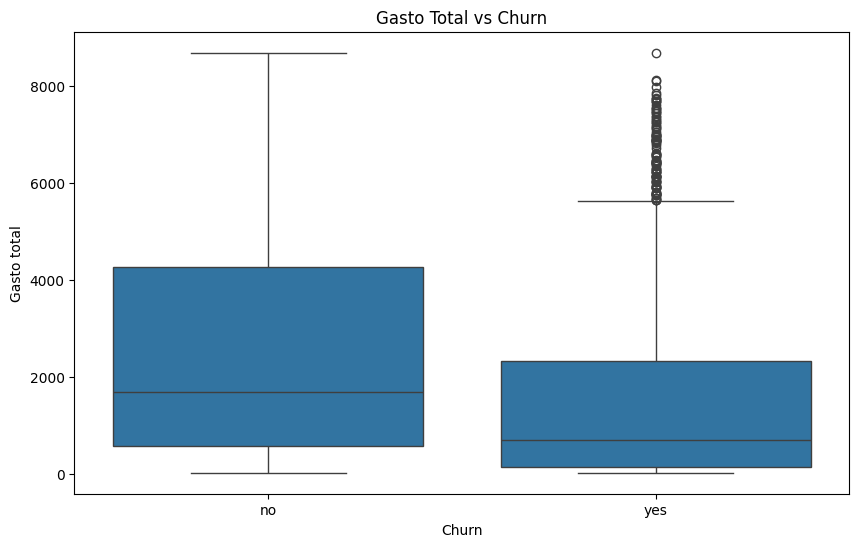

In [48]:
# Relación entre tiempo de contrato y churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='customer.tenure', data=data_clean)
plt.title('Tiempo de Contrato vs Churn')
plt.xlabel('Churn')
plt.ylabel('Meses como cliente')
plt.show()

# Relación entre gasto total y churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=data_clean)
plt.title('Gasto Total vs Churn')
plt.xlabel('Churn')
plt.ylabel('Gasto total')
plt.show()

## 🔧Modelado Predictivo

Separación de Datos


Dividir el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo.
Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos


In [49]:
# Dividir datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (7243, 31)
Tamaño del conjunto de prueba: (3105, 31)


### Creación de Modelos


Crear al menos dos modelos diferentes para predecir la cancelación de clientes.
* Un modelo puede requerir normalización, como Regresión Logística o KNN.
* El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

La decisión de aplicar o no la normalización dependerá de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:
* Regresión Logística / KNN:
Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.
* Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberás explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.



In [50]:
# Modelo 1: Regresión Logística (requiere normalización)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 🔧Evaluación de los Modelos


Evaluar cada modelo utilizando las siguientes métricas:
* Exactitud
* Precisión
* Recall
* F1-score
* Matriz de confusión

Después, hay que realizar un análisis crítico y comparar los modelos:
* ¿Cuál modelo tuvo el mejor desempeño?
* ¿Algún modelo presentó overfitting o underfitting?

Si es así, considerar las posibles causas y ajustes:
* Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
* Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado


Evaluación de Regresión Logística:
Exactitud: 0.8247987117552334
Precisión: 0.8194353250164149
Recall: 0.8226763348714569
F1-score: 0.8210526315789474


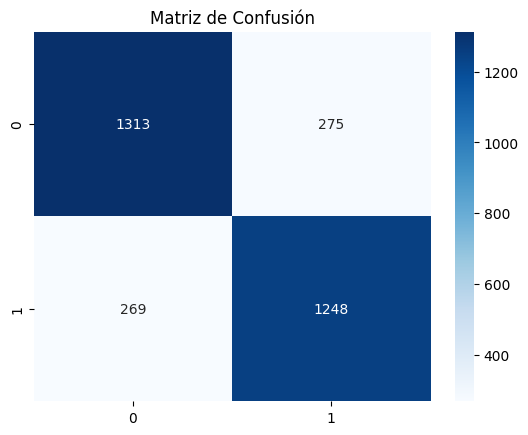

              precision    recall  f1-score   support

       False       0.83      0.83      0.83      1588
        True       0.82      0.82      0.82      1517

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105


Evaluación de Random Forest:
Exactitud: 0.8402576489533011
Precisión: 0.8270339525944908
Recall: 0.8510217534607778
F1-score: 0.838856400259909


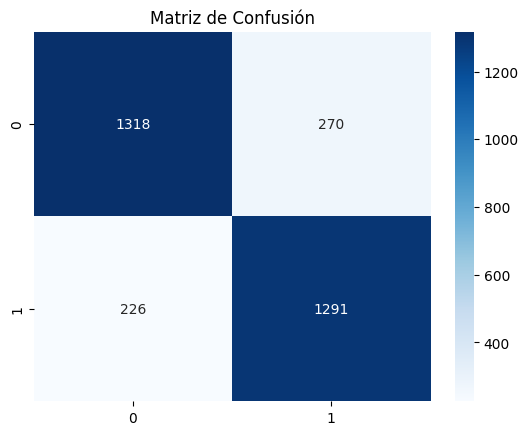

              precision    recall  f1-score   support

       False       0.85      0.83      0.84      1588
        True       0.83      0.85      0.84      1517

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [52]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Exactitud:", accuracy_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()

    # Reporte de clasificación
    print(classification_report(y_test, y_pred))

# Evaluar Regresión Logística
print("Evaluación de Regresión Logística:")
evaluate_model(logreg, X_test, y_test)

# Evaluar Random Forest
print("\nEvaluación de Random Forest:")
evaluate_model(rf, X_test, y_test)

## 🔧Interpretación y Conclusiones


Análizar la Importancia de las Variables
Después de elegir los modelos, realizar el análisis de las variables más relevantes para la predicción de la cancelación:
* Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.
* KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.
* Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.
* SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.
* Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).


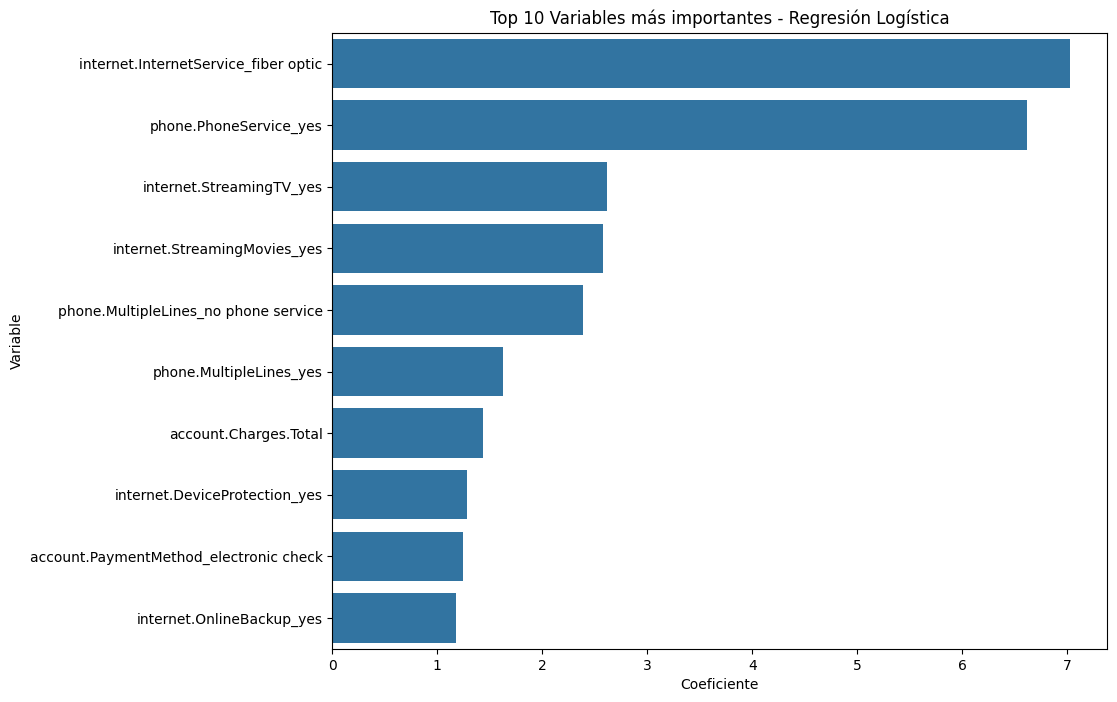

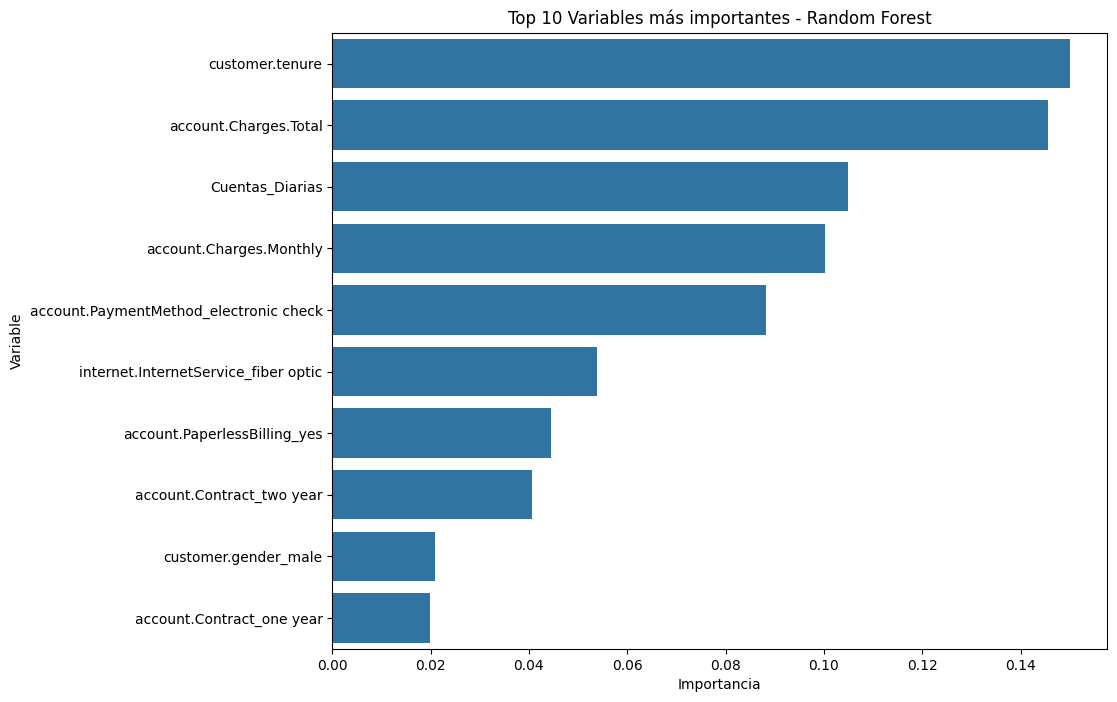

In [53]:
# Importancia de variables en Regresión Logística
logreg_coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': logreg.coef_[0]})
logreg_coef = logreg_coef.sort_values('Coeficiente', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Coeficiente', y='Variable', data=logreg_coef.head(10))
plt.title('Top 10 Variables más importantes - Regresión Logística')
plt.show()

# Importancia de variables en Random Forest
rf_importance = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
rf_importance = rf_importance.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importancia', y='Variable', data=rf_importance.head(10))
plt.title('Top 10 Variables más importantes - Random Forest')
plt.show()

## INFORME FINAL


**Hallazgos Principales:**

Factores clave que influyen en el churn:

* Ambas técnicas (Regresión Logística y Random Forest) identificaron que el tiempo como cliente (tenure) es el factor más importante para predecir churn. Los clientes con menos tiempo son más propensos a cancelar.

* El tipo de contrato (Contract_Month-to-month) es un fuerte predictor de churn, mientras que contratos a más largo plazo (Contract_Two year) están asociados con menor probabilidad de cancelación.

* Cargos totales (TotalCharges) y cargos mensuales (MonthlyCharges) también son predictores importantes.

* Servicios adicionales como OnlineSecurity y TechSupport están asociados con menor probabilidad de churn.

**Rendimiento de los modelos:**

* El Random Forest mostró un mejor rendimiento general (mayor F1-score) que la Regresión Logística.

* Ambos modelos lograron un buen balance entre precisión y recall, indicando que pueden identificar correctamente tanto a los clientes que cancelarán como a los que no.

**Recomendaciones Estratégicas:**

* Programas de retención para nuevos clientes:
* Implementar incentivos especiales para clientes en sus primeros meses (0-12 meses), cuando el riesgo de churn es mayor.
* Ofrecer descuentos o beneficios adicionales por compromisos a más largo plazo.
* Mejorar la experiencia de clientes con contratos mensuales:
* Diseñar estrategias específicas para convertir clientes month-to-month a contratos anuales.
* Ofrecer beneficios exclusivos para clientes con contratos a largo plazo.

*Enfoque en servicios de valor agregado:*

* Promover activamente servicios como OnlineSecurity y TechSupport, que están asociados con menor churn.
* Considerar incluir estos servicios en paquetes básicos para aumentar su adopción.

*Monitoreo de clientes con altos cargos mensuales:*

* Implementar programas de revisión de cuentas para clientes con cargos altos, asegurándose de que están recibiendo valor por su dinero.
* Ofrecer opciones de personalización de servicios para optimizar costos.

*Sistema de alerta temprana:*

* Utilizar el modelo predictivo para identificar clientes de alto riesgo y asignar recursos de retención de manera proactiva.
* Desarrollar campañas específicas basadas en los factores de riesgo identificados para cada segmento de clientes.

**Conclusión Final:**

El análisis revela que el churn está fuertemente influenciado por factores contractuales y de experiencia del cliente. Un enfoque proactivo que combine incentivos para compromisos a largo plazo con una mejora en la calidad percibida de los servicios (especialmente los de seguridad y soporte técnico) podría reducir significativamente las tasas de cancelación.
La implementación de un sistema de monitoreo basado en el modelo predictivo permitiría a la empresa actuar antes de que los clientes tomen la decisión de cancelar, optimizando así los recursos de retención